In [1]:
# Diabetes Prediction Using Machine Learning

In [4]:
# importing the necessary libraries
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Basic Data Science and ML Pipeline

In [5]:
#Loading the dataset
diabetes_data = pd.read_csv('data.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Basic EDA and statistical analysis


In [6]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Issues with zero values
#### Subject matter expertise is needed to address them.

Looks like following columns or variables have an invalid zero value:
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

#### It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [17]:
diabetes_data_copy = diabetes_data.copy() # creating the copy of the dataset
# replacing the 0 values with Nan
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [18]:
#since we will not loose too many data points with nan so safest way would be just to drop them
diabetes_data_copy.dropna(subset=['Glucose','BloodPressure','SkinThickness','Insulin','BMI'],inplace=True)

#### Histrogram of relevent variables

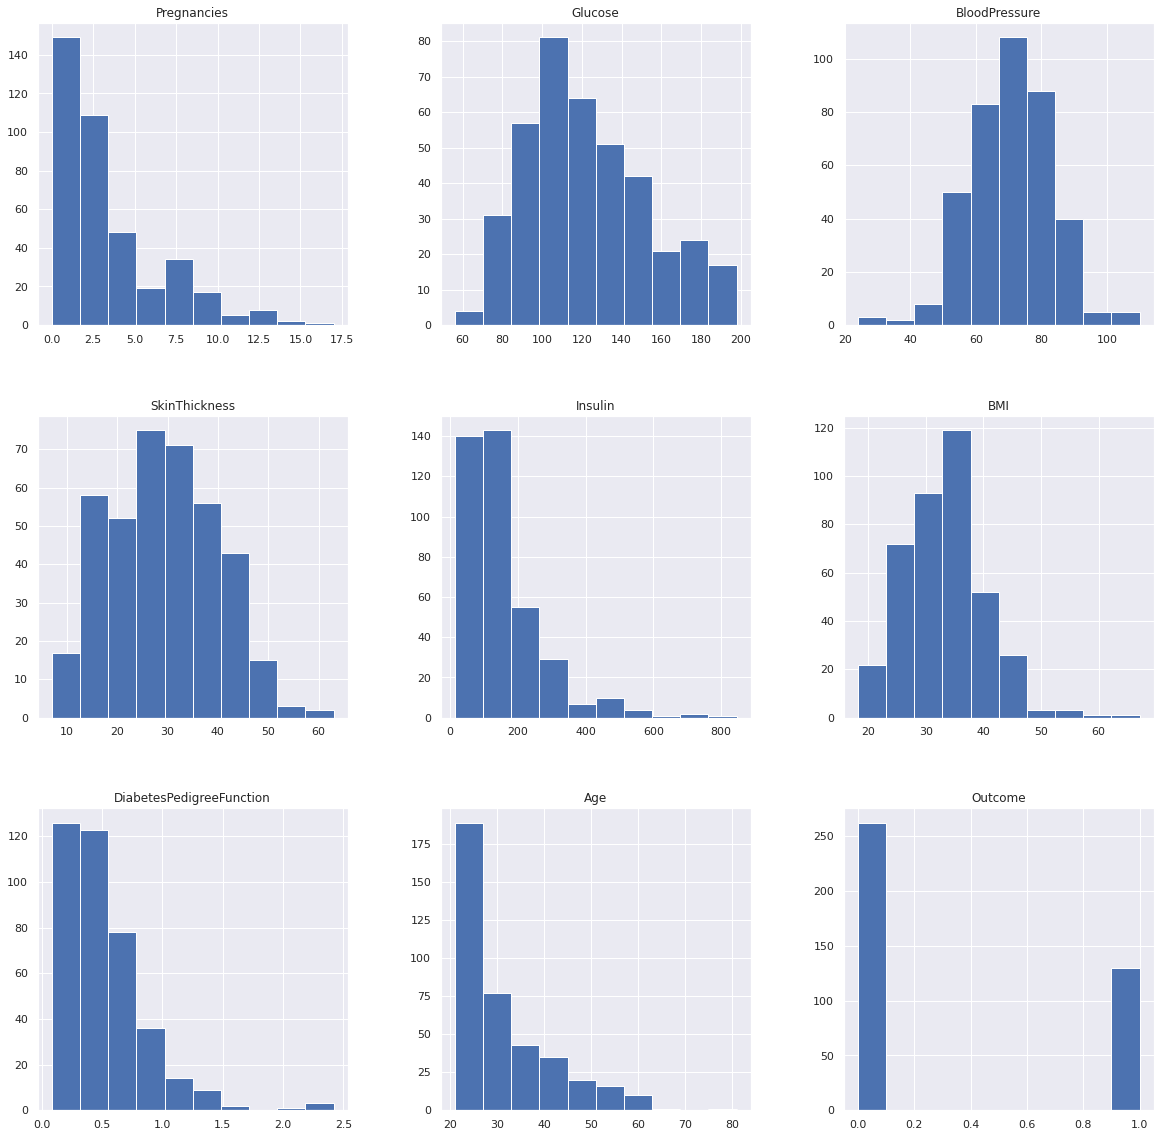

In [19]:
p = diabetes_data_copy.hist(figsize = (20,20))

In [17]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

0    500
1    268
Name: Outcome, dtype: int64


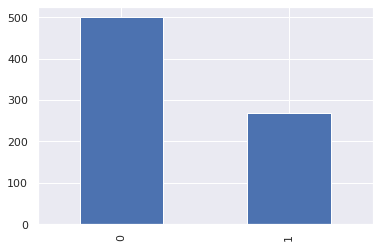

In [16]:
## checking data imbalance 
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")


#### The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

#### Scatter matrix of raw data

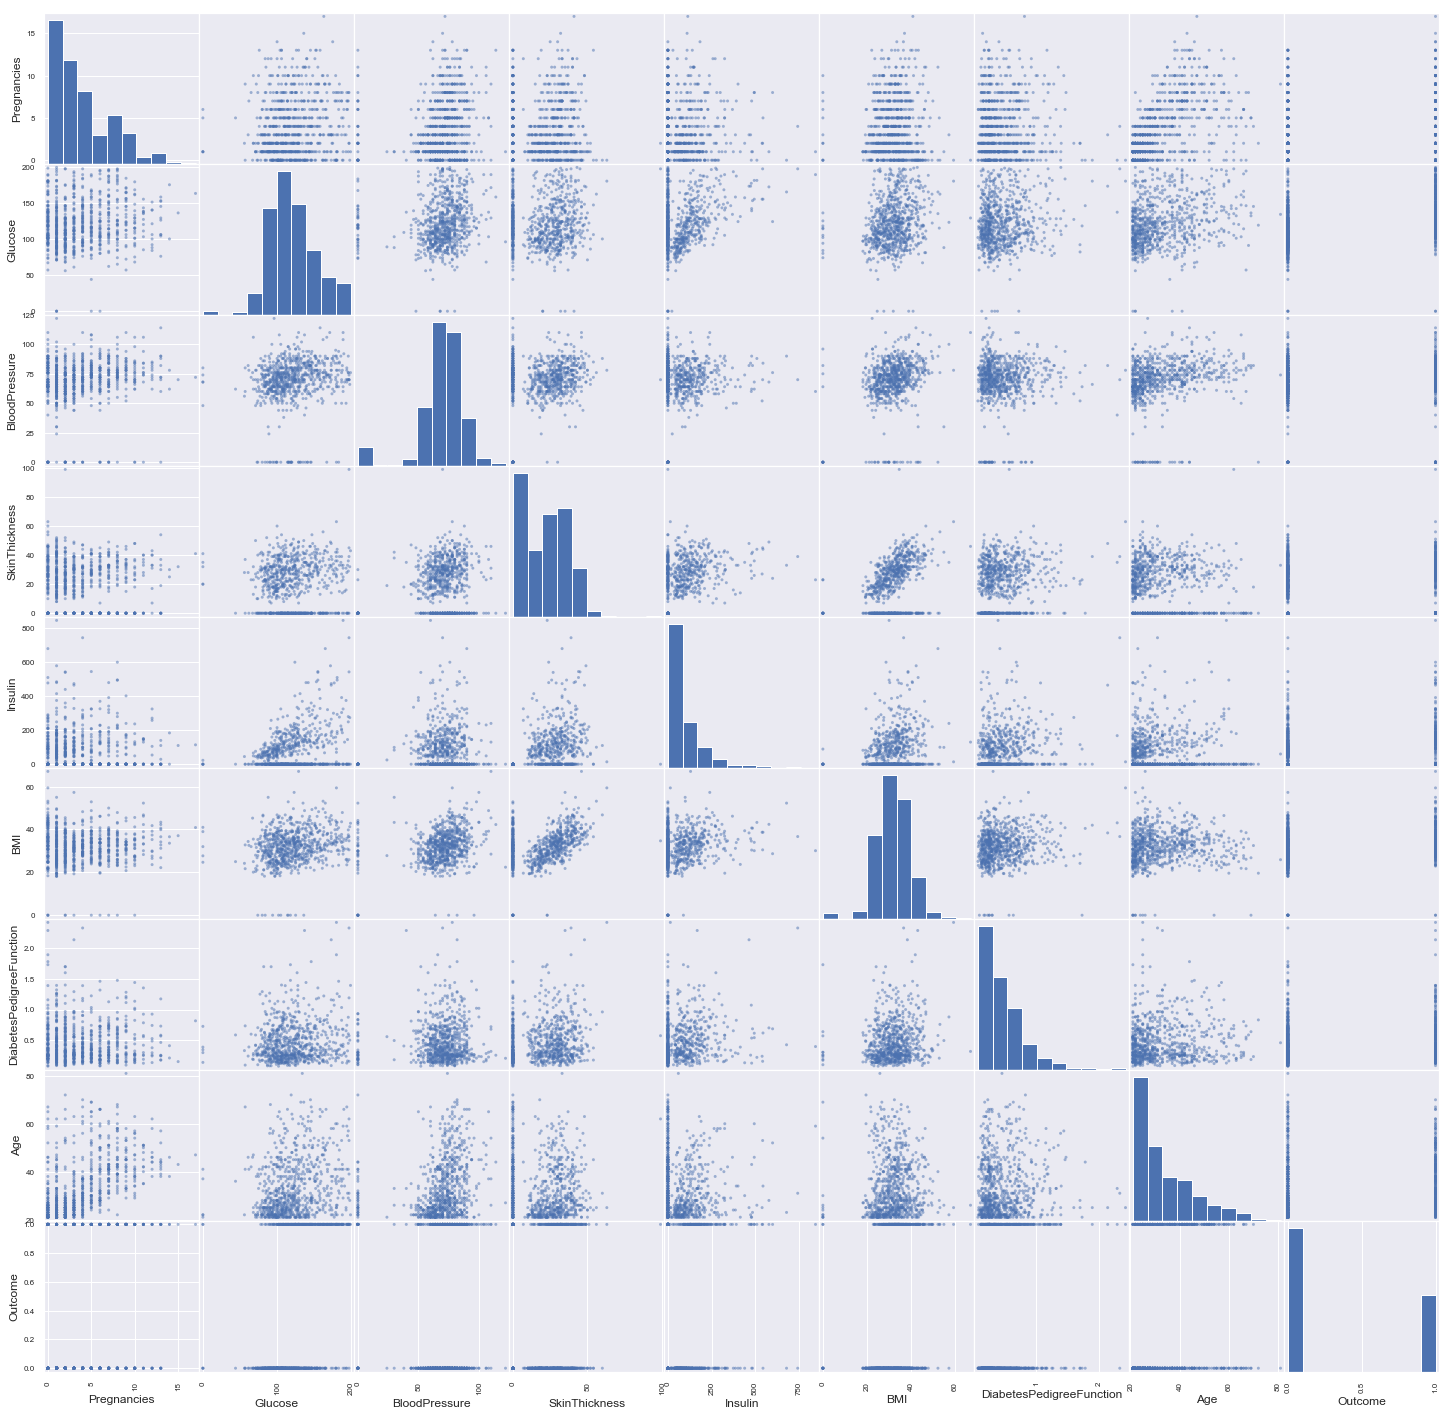

In [27]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes_data,figsize=(25, 25))

###### The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

#### Pair plot for clean data

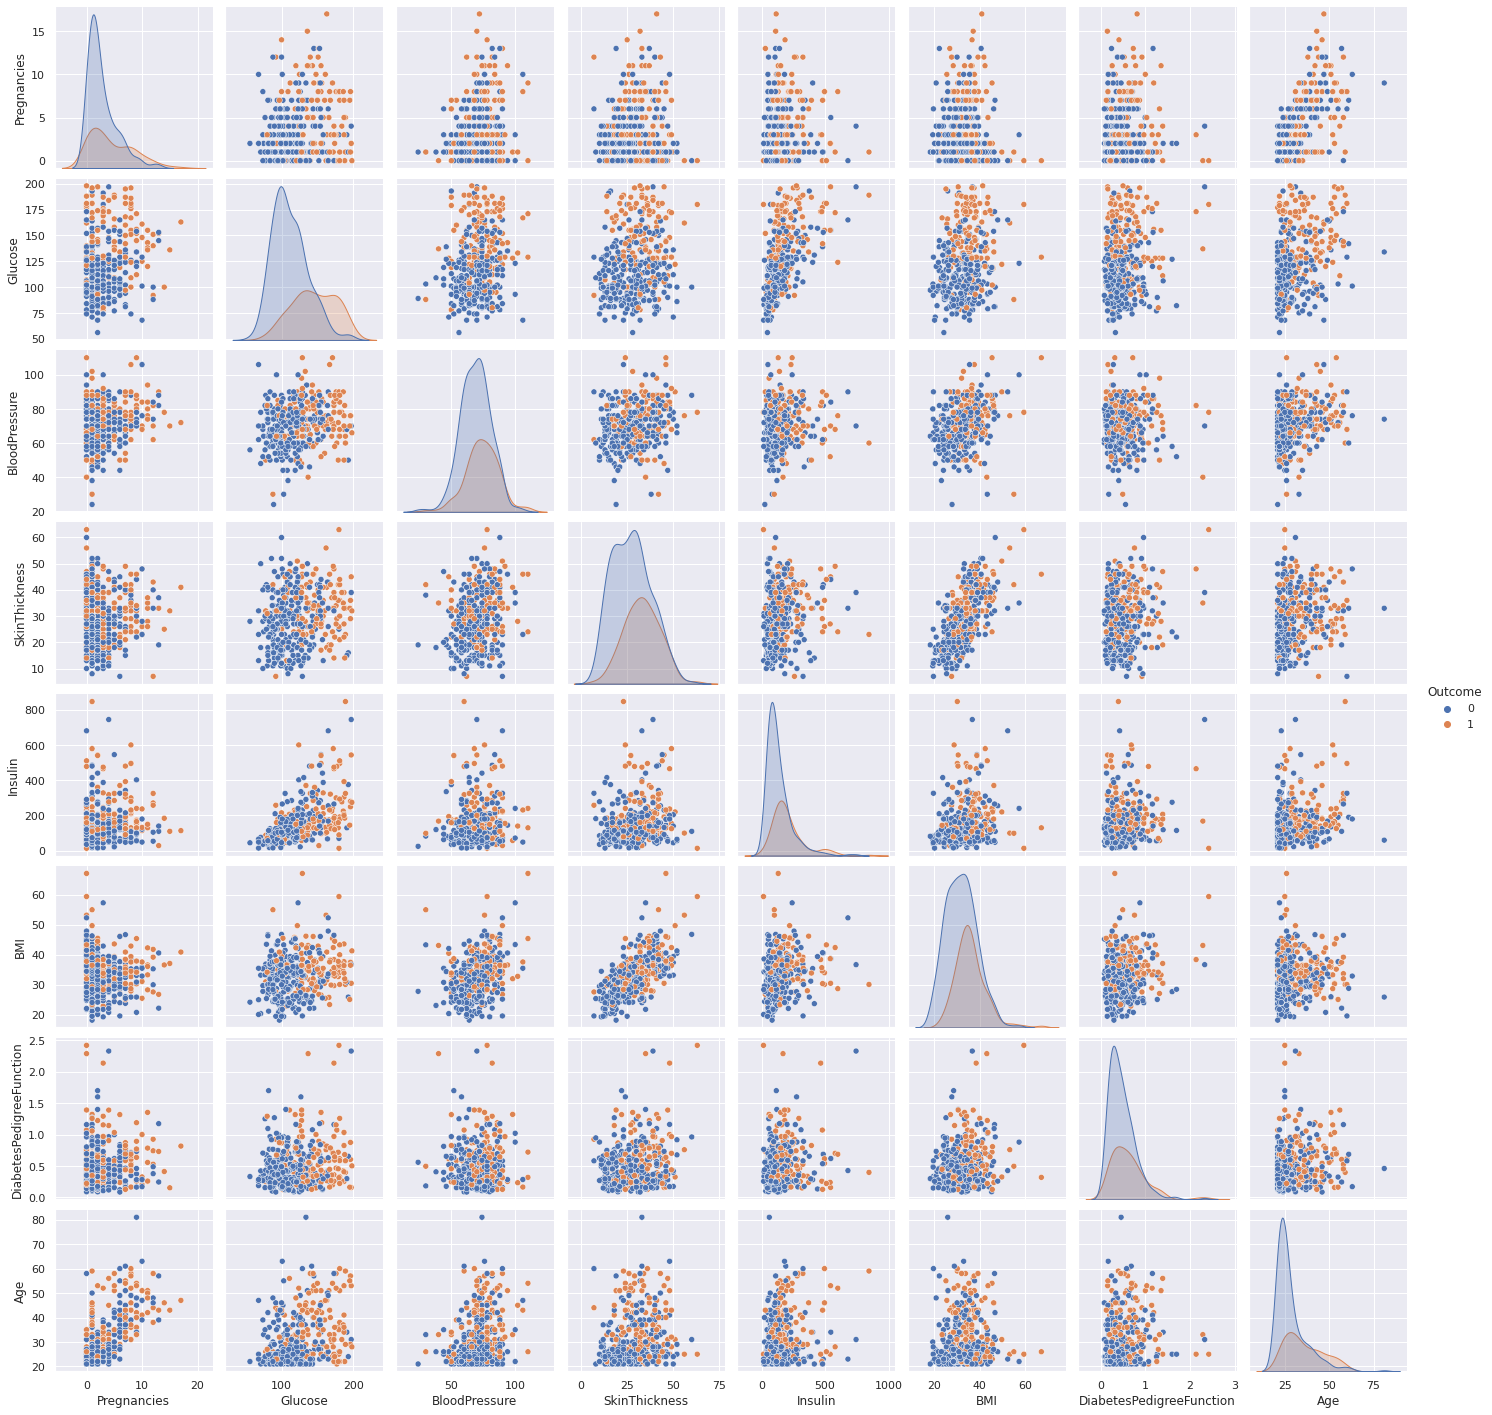

In [20]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

#### Heatmap for unclean data

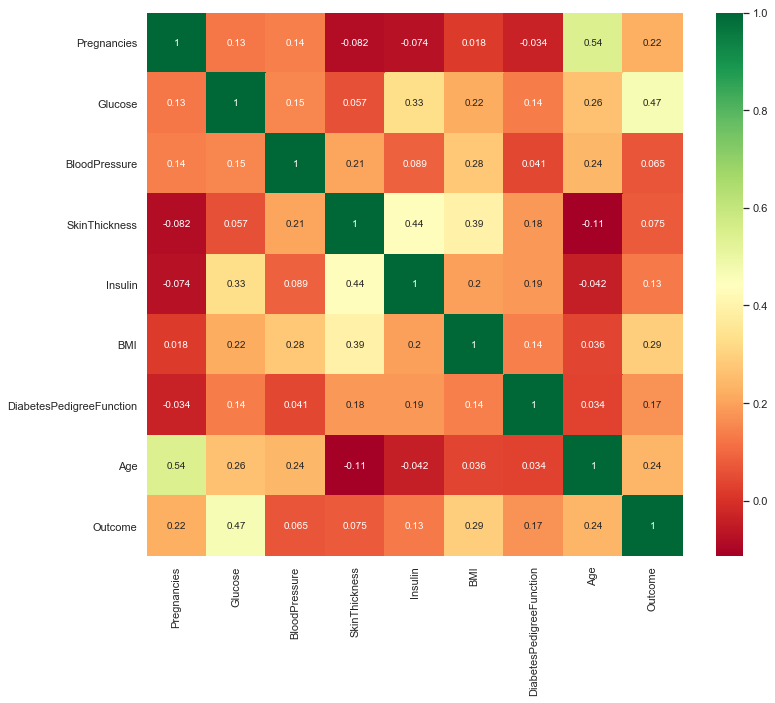

In [29]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

#### Heatmap for clean data

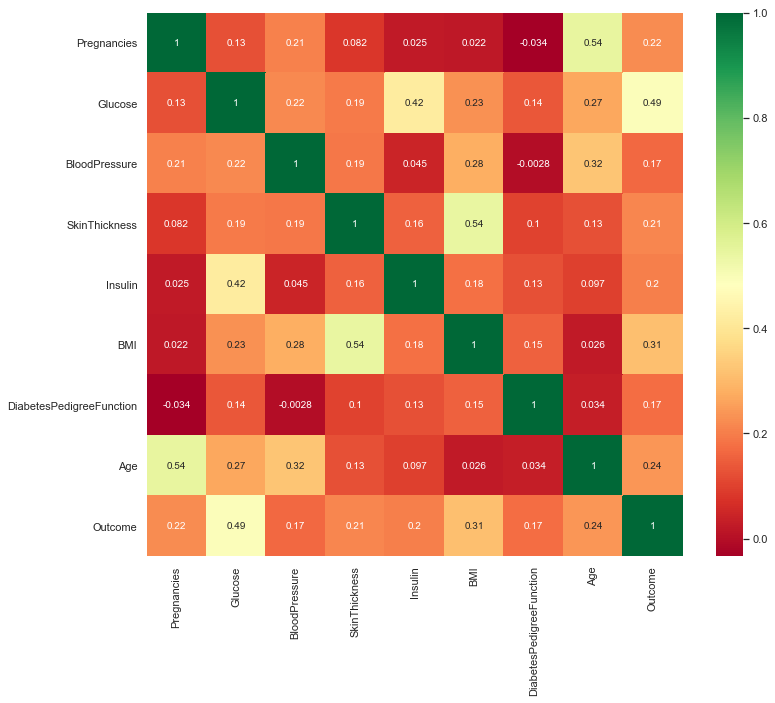

In [30]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [46]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X1=diabetes_data_copy.copy()
X1.drop(columns=['Outcome'],inplace=True)

In [47]:
X1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59


In [25]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data_copy.Outcome  # assigning the label column

In [49]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=1/3,random_state=42, stratify=y)

In [50]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',probability=True))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [51]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above. Creating the confusion Matrix
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [52]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,72,16,88
1,16,27,43
All,88,43,131


Text(0.5, 12.5, 'Predicted label')

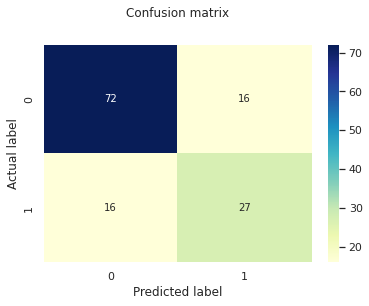

In [53]:
# Creating a Heatmap for the confusion matrix. 
y_pred = clf.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        88
           1       0.63      0.63      0.63        43

    accuracy                           0.76       131
   macro avg       0.72      0.72      0.72       131
weighted avg       0.76      0.76      0.76       131



## 3. ROC - AUC

In [41]:
from sklearn.metrics import roc_curve
y_pred_proba = clf.predict_proba(X_test)[:,1]
y_pred_proba


array([0.06328928, 0.24957336, 0.76526405, 0.37773485, 0.24455628,
       0.14747546, 0.05733742, 0.31169287, 0.19504346, 0.62537609,
       0.75268399, 0.11379135, 0.62074411, 0.29843543, 0.16154616,
       0.27201943, 0.17857579, 0.77218169, 0.17713062, 0.30261938,
       0.06939483, 0.68284129, 0.83652705, 0.09967899, 0.6306777 ,
       0.76297104, 0.11295814, 0.16943218, 0.07966902, 0.4730818 ,
       0.30613951, 0.12746188, 0.09348308, 0.71275471, 0.09694028,
       0.09460631, 0.14156824, 0.40166707, 0.14017108, 0.05645599,
       0.1442654 , 0.09294581, 0.36710017, 0.88571702, 0.27342816,
       0.19625061, 0.43249579, 0.63775745, 0.31502705, 0.41267038,
       0.08278796, 0.51344855, 0.58873467, 0.12794907, 0.72035458,
       0.17297001, 0.42526807, 0.0863394 , 0.16426854, 0.87733592,
       0.54257856, 0.11541335, 0.06554009, 0.49343532, 0.32032345,
       0.13813475, 0.30842337, 0.68550183, 0.50908553, 0.75121193,
       0.09396144, 0.64438397, 0.18950685, 0.18911073, 0.36597

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print('FPR')
print(fpr)
print('TPR')
print(tpr)
print('Thresholds')
print(thresholds)

FPR
[0.         0.         0.01136364 0.01136364 0.02272727 0.02272727
 0.03409091 0.03409091 0.04545455 0.04545455 0.05681818 0.05681818
 0.06818182 0.06818182 0.10227273 0.10227273 0.15909091 0.15909091
 0.18181818 0.18181818 0.20454545 0.20454545 0.22727273 0.22727273
 0.23863636 0.23863636 0.26136364 0.26136364 0.29545455 0.29545455
 0.32954545 0.32954545 0.44318182 0.44318182 0.56818182 0.56818182
 0.60227273 0.60227273 0.75       0.75       0.86363636 0.86363636
 1.        ]
TPR
[0.         0.02325581 0.02325581 0.11627907 0.11627907 0.37209302
 0.37209302 0.41860465 0.41860465 0.48837209 0.48837209 0.51162791
 0.51162791 0.53488372 0.53488372 0.55813953 0.55813953 0.58139535
 0.58139535 0.62790698 0.62790698 0.6744186  0.6744186  0.72093023
 0.72093023 0.74418605 0.74418605 0.76744186 0.76744186 0.8372093
 0.8372093  0.86046512 0.86046512 0.88372093 0.88372093 0.90697674
 0.90697674 0.93023256 0.93023256 0.97674419 0.97674419 1.
 1.        ]
Thresholds
[1.90697795 0.90697795 0.8

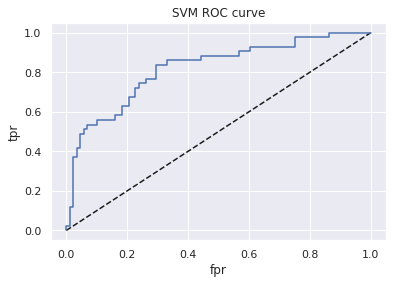

In [45]:
# Plotting the ROC Curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='SVM')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('SVM ROC curve')
plt.show()

In [44]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8184460887949261

In [36]:
## End of the Notebook